In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller

In [11]:
#first,we try to prepare the data of ARIMA.
adata=pd.read_csv("E:/mini project bristol/processed data(LOBS,tapes)/processed_LOBs.csv",index_col="Time")
adata

,Encode,bid_ask_spread,Mid_Price,Best_bid_price,bid_volume,Best_ask_price,ask_volume,book_Depth,order_Imbalance
Time,,,,,,,,,
0.000,Exch0,NaN,NaN,NaN,NaN,NaN,NaN,0,0
0.279,Exch0,NaN,NaN,1.0,6.0,NaN,NaN,6,6
1.333,Exch0,799.0,400.5,1.0,6.0,800.0,1.0,7,5
1.581,Exch0,798.0,400.0,1.0,6.0,799.0,1.0,7,5
1.643,Exch0,797.0,399.5,1.0,6.0,798.0,1.0,7,5
...,...,...,...,...,...,...,...,...,...
30599.542,Exch0,4.0,292.0,290.0,1.0,294.0,1.0,2,0
30599.573,Exch0,4.0,292.0,290.0,1.0,294.0,1.0,2,0
30599.635,Exch0,4.0,292.0,290.0,1.0,294.0,1.0,2,0


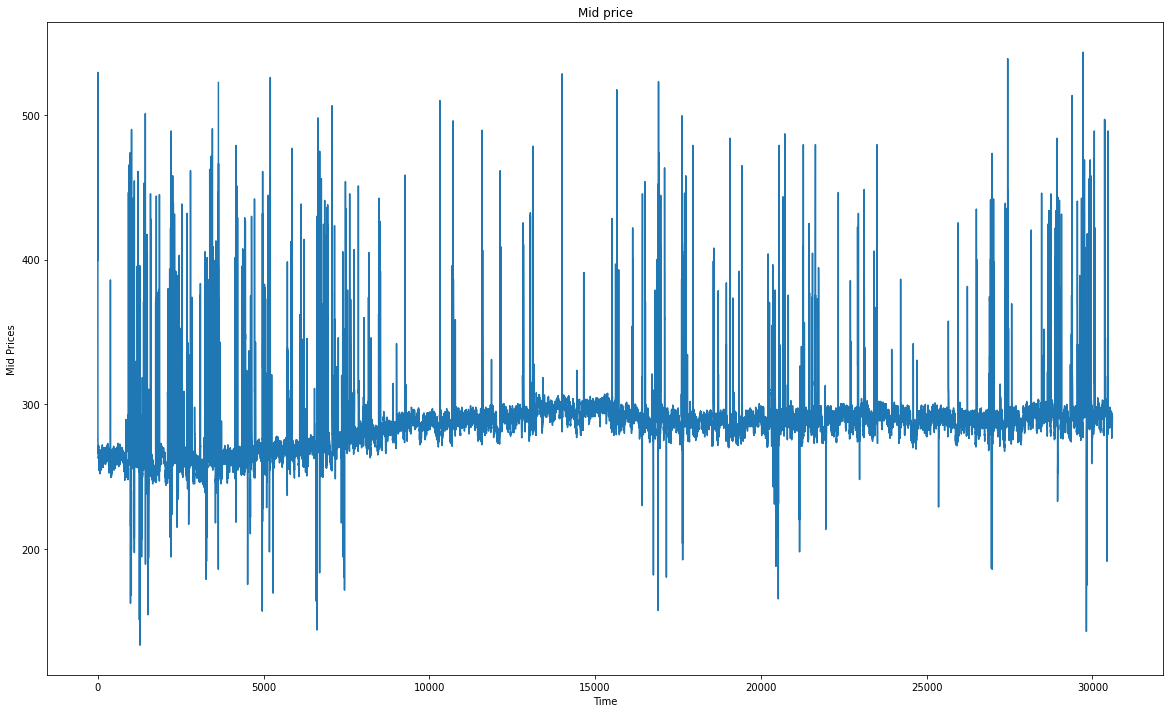

In [13]:
plt.figure(figsize=(20,12))
plt.xlabel('Time')
plt.ylabel('Mid Prices')
plt.plot(adata['Mid_Price'])
plt.title('Mid price')
plt.show()

<AxesSubplot:ylabel='Density'>

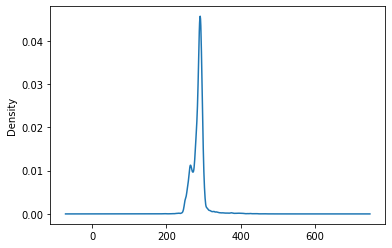

In [14]:
df_mid=adata['Mid_Price']
df_mid.plot(kind='kde')#Kernel Density Estimation of Mid Prices

In [16]:
#when we use the arima, we need to check if a series is stationary or not. because the arima need stationary data.
def test_stationarity(timeseries):
    print("Results for dickey fuller test")
    results=adfuller(timeseries, autolag='AIC')
    output=pd.Series(results[0:4], index=['Test Statistics', 'p-value', 'No. of lags used', 'Number of observations used'])
    for key, values in results[4].items():
        output['critical value (%s)'%key] =values
    print(output)

In [18]:
from sklearn.preprocessing import MinMaxScaler
df_mid=df_mid.dropna()
df_mid=np.log(df_mid)
# from scipy.stats import zscore
# df=df_mid.apply(zscore)
# scaler=MinMaxScaler()
# data=df_mid.reshape(-1,1)
# df_mid=scaler.fit_transform(df_mid)
test_stationarity(df_mid)

Results for dickey fuller test
Test Statistics                   -29.565483
p-value                             0.000000
No. of lags used                   93.000000
Number of observations used    352866.000000
critical value (1%)                -3.430369
critical value (5%)                -2.861548
critical value (10%)               -2.566774
dtype: float64


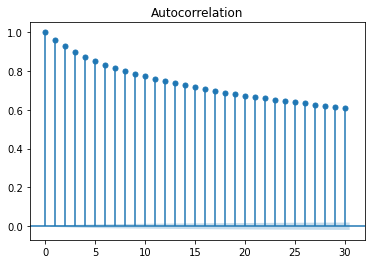

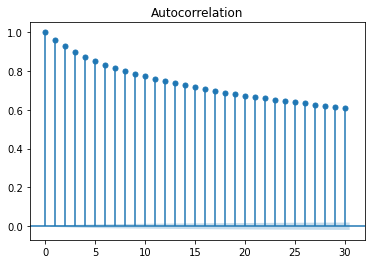

In [20]:
n_lags=30
plot_acf(df_mid,lags=n_lags)

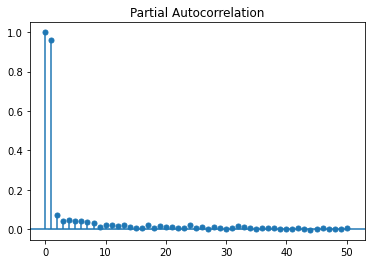

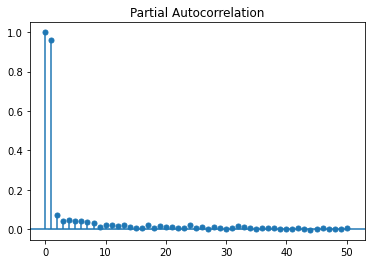

In [21]:
plot_pacf(df_mid,lags=n_lags+20)